In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

데이터 불러오기

In [16]:
#import train and test CSV files
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

#take a look at the training data
#train.describe(include="all")
train.head()
#Pclass - 우등석
#Survived - 이놈 맞추기
#Sex - 성별
#SibSp - 형제/배우자 있음?
#Parch - 부모/자식 있음?
#Cabin - 객실 있음? 없음?
#Embarked - 어느 항구에서 출항함?


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:

# 뭘 뺄까 =['Name','Age','Ticket','Cabin','PassengerId']

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
drop_lists=['Name','Age','Ticket','Cabin','PassengerId']
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


print(pd.isnull(train).sum())
print('='*50)
print(pd.isnull(test).sum())

train.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [19]:
# X, y 설정
train_X = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_y = train[['PassengerId','Survived']]

# 테스트 데이터 준비
test_X = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [20]:
#필요없는 데이터 날리고
train = train.drop(drop_lists, axis = 1)
test = test.drop(drop_lists, axis = 1)
train = train.drop('Survived', axis = 1)

In [21]:
#테스트 데이터에 Survival- y값이 없어서 train 데이터 쪼게기,,


train_X = train_X[:-292]
train_y = train_y[:-292]

val_X = train_X[-293:-101]
val_y = train_y[-293:-101]


test_X = train_X[-100:]
test_y = train_y[-100:]

#실습코드보고 다시 나누기

In [22]:
test_X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
499,3,0,0,0,7.7958,1.0
500,3,0,0,0,8.6625,1.0
501,3,1,0,0,7.7500,3.0
502,3,1,0,0,7.6292,3.0
503,3,1,0,0,9.5875,1.0
...,...,...,...,...,...,...
594,2,0,1,0,26.0000,1.0
595,3,0,1,1,24.1500,1.0
596,2,1,0,0,33.0000,1.0
597,3,0,0,0,0.0000,1.0


In [23]:
import torch.nn as nn
cls_loss = nn.CrossEntropyLoss()

In [24]:
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score


class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=6, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=200)
        self.linear3 = nn.Linear(in_features=200, out_features=2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x


cls_loss = nn.CrossEntropyLoss()


model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)


list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

train_X = torch.FloatTensor(train_X.values)
train_y = torch.LongTensor(train_y['Survived'].values)

val_X = torch.FloatTensor(val_X.values)
val_y = torch.LongTensor(val_y['Survived'].values)


42002 parameters


In [25]:

epoch = 4000
for i in range(epoch):
    # ====== Train ====== #
    model.train()  # train 모드로 설정
    optimizer.zero_grad()  # 그라디언트 초기화
    pred_y = model(train_X)
    
    # 손실 계산
    loss = cls_loss(pred_y, train_y)
    loss.backward()  # Backpropagation
    optimizer.step()  # 파라미터 업데이트

    # 손실 기록
    list_epoch.append(i)
    list_train_loss.append(loss.item())

    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        # ====== Calculate Accuracy ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X.values)
        true_y = torch.Tensor(test_y.values)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y[:,1], pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_acc.append(acc)
        list_acc_epoch.append(i)
        print(f'epoch_count :{i} ^____^ acc :{acc*100}%')


epoch_count :0 ^____^ acc :57.99999999999999
epoch_count :200 ^____^ acc :60.0
epoch_count :400 ^____^ acc :65.0
epoch_count :600 ^____^ acc :62.0
epoch_count :800 ^____^ acc :75.0
epoch_count :1000 ^____^ acc :83.0
epoch_count :1200 ^____^ acc :76.0
epoch_count :1400 ^____^ acc :77.0
epoch_count :1600 ^____^ acc :74.0
epoch_count :1800 ^____^ acc :77.0
epoch_count :2000 ^____^ acc :80.0
epoch_count :2200 ^____^ acc :79.0
epoch_count :2400 ^____^ acc :79.0
epoch_count :2600 ^____^ acc :79.0
epoch_count :2800 ^____^ acc :77.0
epoch_count :3000 ^____^ acc :78.0
epoch_count :3200 ^____^ acc :77.0
epoch_count :3400 ^____^ acc :77.0
epoch_count :3600 ^____^ acc :77.0
epoch_count :3800 ^____^ acc :77.0


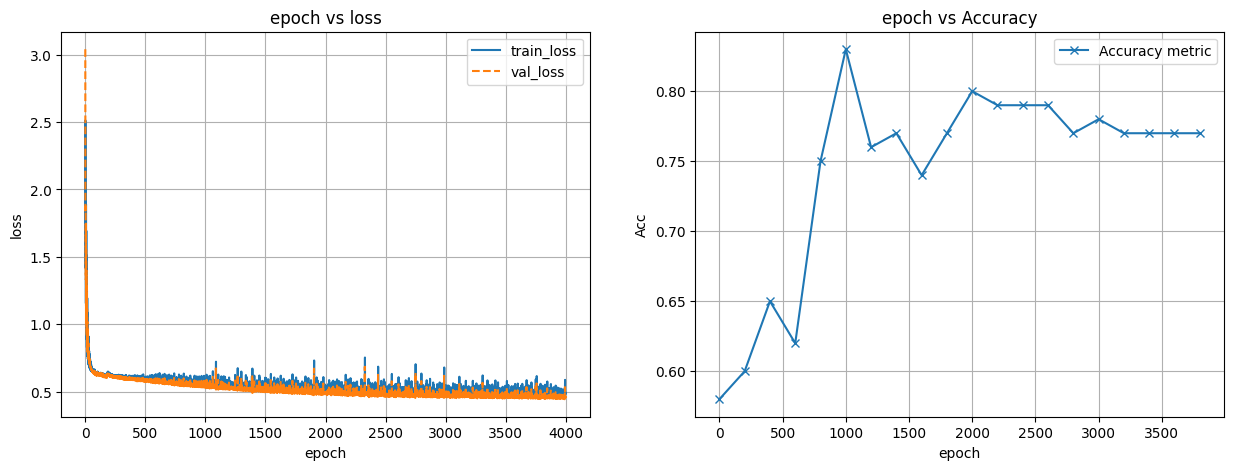

In [26]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()
plt.close()

In [387]:
train_X

tensor([[  3.0000,   0.0000,   1.0000,   0.0000,   7.2500,   1.0000],
        [  1.0000,   1.0000,   1.0000,   0.0000,  71.2833,   2.0000],
        [  3.0000,   1.0000,   0.0000,   0.0000,   7.9250,   1.0000],
        ...,
        [  3.0000,   0.0000,   0.0000,   0.0000,   8.0500,   1.0000],
        [  1.0000,   0.0000,   1.0000,   2.0000, 151.5500,   1.0000],
        [  1.0000,   1.0000,   0.0000,   0.0000, 110.8833,   2.0000]])

In [377]:
test_X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
499,3,0,0,0,7.7958,1.0
500,3,0,0,0,8.6625,1.0
501,3,1,0,0,7.7500,3.0
502,3,1,0,0,7.6292,3.0
503,3,1,0,0,9.5875,1.0
...,...,...,...,...,...,...
594,2,0,1,0,26.0000,1.0
595,3,0,1,1,24.1500,1.0
596,2,1,0,0,33.0000,1.0
597,3,0,0,0,0.0000,1.0


In [378]:
# ====== True Y Scattering ====== #
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_X.values[:, 1], pred_y[:, 1], c=test_y)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('True test y')

# ====== Predicted Y Scattering ====== #
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(test_X[:, 0], pred_y[:, 1], c=pred_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Predicted test y')

# ====== Just for Visualizaing with High Resolution ====== #
input_x = torch.Tensor(train_X)
pred_y = model(input_x).detach().max(dim=1)[1].numpy() 

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(train_X[:, 0], pred_y[:, 1], c=pred_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Prediction on train set')

plt.show()
print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

TypeError: 'builtin_function_or_method' object is not subscriptable

In [34]:
pred_y.detach().max(dim=1)[1].numpy()

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [30]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}, Value: {param.data}")

Layer: linear1.weight, Value: tensor([[-0.3540,  0.0026,  0.3476, -0.0672, -0.0145,  0.0726],
        [-0.1552, -0.2556,  0.3838,  0.1541,  0.1624, -0.1404],
        [-0.3200,  0.3233,  0.3340,  0.0529, -0.2476,  0.1375],
        ...,
        [ 0.2234,  0.1351,  0.1815, -0.1215,  0.2848,  0.3025],
        [ 0.1295, -0.0080, -0.4119,  0.1716,  0.3312, -0.3386],
        [-0.2930, -0.0602,  0.3676,  0.2035,  0.3139, -0.1881]])
Layer: linear1.bias, Value: tensor([-0.3216, -0.1383, -0.2434, -0.1081, -0.3272, -0.2513,  0.3935, -0.1540,
        -0.1446, -0.1598,  0.3278,  0.1046, -0.2060,  0.3963, -0.3921, -0.1243,
         0.0580, -0.2379,  0.0194,  0.2639,  0.0351, -0.2688, -0.3197, -0.0682,
         0.2459,  0.2887,  0.3422,  0.3343,  0.0917,  0.1107, -0.3912, -0.1099,
        -0.2572,  0.3645,  0.0689, -0.3982,  0.0378,  0.0758, -0.1365,  0.1349,
        -0.1685,  0.0844,  0.1711,  0.2771,  0.2907, -0.3334, -0.1280,  0.2470,
        -0.1424, -0.1494,  0.0423,  0.0750, -0.1204, -0.4030, -0

In [32]:
# 예를 들어 첫 번째 레이어의 가중치와 바이어스에 접근하기
linear1_weight = model.linear1.weight.data
linear1_bias = model.linear1.bias.data

print("First Layer Weight:\n", linear1_weight)
print("First Layer Bias:\n", linear1_bias)


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)